Projet Logiciel DAC : Changement de comportement dans des traces utilisateurs
--------

### Estimation de densité par un noyaux gaussien

In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
dico = dict()
for i in range(182):
    if((i>9) and (i<100)):
        if(os.path.exists('Geolife_Trajectories_1.3/Data/0'+ str(i) +'/Trajectory/')):
            dico['0'+str(i)] = os.listdir('Geolife_Trajectories_1.3/Data/0'+ str(i) +'/Trajectory/')
    elif(i<10):
        if(os.path.exists('Geolife_Trajectories_1.3/Data/00'+ str(i) +'/Trajectory/')):
            dico['00'+str(i)] = os.listdir('Geolife_Trajectories_1.3/Data/00'+ str(i) +'/Trajectory/')
    else:
        if(os.path.exists('Geolife_Trajectories_1.3/Data/'+ str(i) +'/Trajectory/')):
            dico[str(i)] = os.listdir('Geolife_Trajectories_1.3/Data/'+ str(i) +'/Trajectory/')

for i in dico.keys():
    dico[i].sort()
dico

{'000': ['20081023025304.plt',
  '20081024020959.plt',
  '20081026134407.plt',
  '20081027115449.plt',
  '20081028003826.plt',
  '20081029092138.plt',
  '20081029093038.plt',
  '20081103101336.plt',
  '20081103232153.plt',
  '20081110013637.plt',
  '20081111001704.plt',
  '20081112023003.plt',
  '20081112091400.plt',
  '20081113034608.plt',
  '20081114015255.plt',
  '20081114101436.plt',
  '20081115010133.plt',
  '20081116085532.plt',
  '20081117051133.plt',
  '20081117155223.plt',
  '20081118095005.plt',
  '20081118095400.plt',
  '20081118162008.plt',
  '20081119012806.plt',
  '20081119112035.plt',
  '20081120035736.plt',
  '20081121040936.plt',
  '20081121113038.plt',
  '20081122012309.plt',
  '20081123102153.plt',
  '20081201111827.plt',
  '20081202071136.plt',
  '20081202071531.plt',
  '20081203032326.plt',
  '20081203151206.plt',
  '20081203234939.plt',
  '20081210023503.plt',
  '20081211044624.plt',
  '20081211121432.plt',
  '20081212042525.plt',
  '20081212101236.plt',
  '200812

In [3]:
l = []
for i in dico.keys():
    l.append([i,len(dico[i])])
l.sort()
print(l) 

[['000', 171], ['001', 71], ['002', 175], ['003', 322], ['004', 395], ['005', 86], ['006', 28], ['007', 54], ['008', 34], ['009', 49], ['010', 161], ['011', 201], ['012', 77], ['013', 144], ['014', 279], ['015', 67], ['016', 51], ['017', 391], ['018', 50], ['019', 84], ['020', 151], ['021', 8], ['022', 146], ['023', 34], ['024', 101], ['025', 757], ['026', 43], ['027', 5], ['028', 64], ['029', 45], ['030', 296], ['031', 6], ['032', 16], ['033', 13], ['034', 198], ['035', 74], ['036', 72], ['037', 148], ['038', 110], ['039', 227], ['040', 27], ['041', 557], ['042', 150], ['043', 43], ['044', 72], ['045', 9], ['046', 31], ['047', 12], ['048', 3], ['049', 1], ['050', 51], ['051', 51], ['052', 104], ['053', 9], ['054', 3], ['055', 24], ['056', 31], ['057', 22], ['058', 22], ['059', 8], ['060', 2], ['061', 20], ['062', 706], ['063', 15], ['064', 23], ['065', 137], ['066', 19], ['067', 120], ['068', 408], ['069', 8], ['070', 11], ['071', 73], ['072', 2], ['073', 112], ['074', 91], ['075', 13

In [4]:
def TraceByUser(User):
    #concatene toutes les traces (tous les fichiers) de l'uitlisateur en parametre
    UserL = np.array([])
    fichier = 'Geolife_Trajectories_1.3/Data/'+User+'/Trajectory/'
    cpt = 0
    for i in dico[User]:
        n = np.loadtxt(fichier+i, delimiter=",", skiprows=6 ,dtype='str')
        if(cpt==0):
            UserL = n
            cpt = 1
        else:
            UserL = np.vstack((UserL,n))
    return UserL

def get_distance_m(lat1, lng1, lat2, lng2):
    earth_radius = 6378137   # Terre = sphere de 6378km de rayon
    rlo1 = np.deg2rad(lng1)
    rla1 = np.deg2rad(lat1)
    rlo2 = np.deg2rad(lng2)
    rla2 = np.deg2rad(lat2)
    dlo = (rlo2 - rlo1)*1.0 / 2
    dla = (rla2 - rla1)*1.0 / 2
    a = (math.sin(dla) * math.sin(dla)) + math.cos(rla1) * math.cos(rla2) * (math.sin(dlo) * math.sin(dlo))
    d = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return (earth_radius * d)/1000

In [5]:
from scipy import stats

def estimation_gaussienne(traces):
    absc = traces[:,1].astype(np.float)
    ordo = traces[:,0].astype(np.float)
    xmin = np.min(absc)
    xmax = np.max(absc)
    ymin = np.min(ordo)
    ymax = np.max(ordo)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([absc, ordo])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    plt.figure(figsize=(10,10),dpi=100)
    plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    plt.colorbar()
    plt.scatter(absc,ordo,s=1,alpha=0.3)
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()
    plt.close()

In [6]:
traces = TraceByUser('011')
traces.shape

(90803, 7)

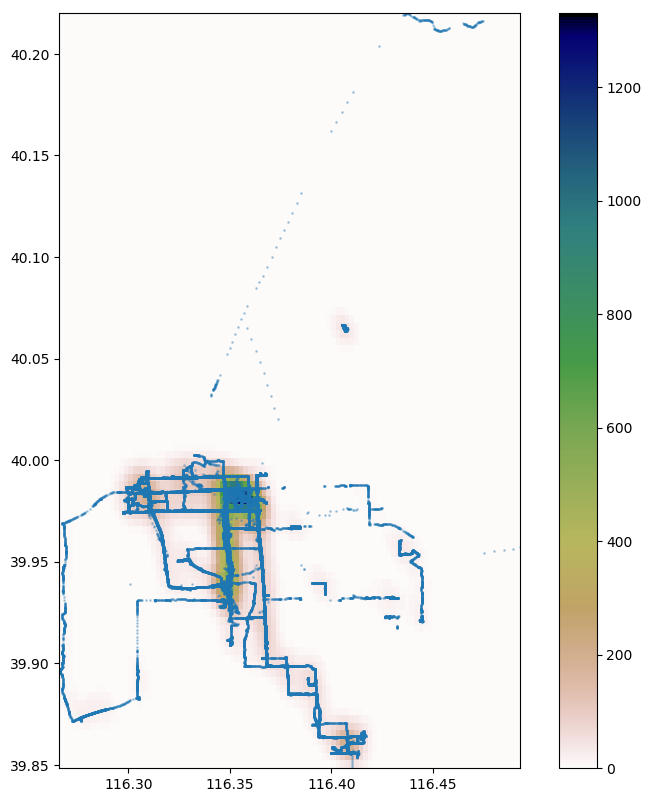

In [37]:
estimation_gaussienne(traces)

In [73]:
traces = TraceByUser('016')
traces.shape

(89272, 7)

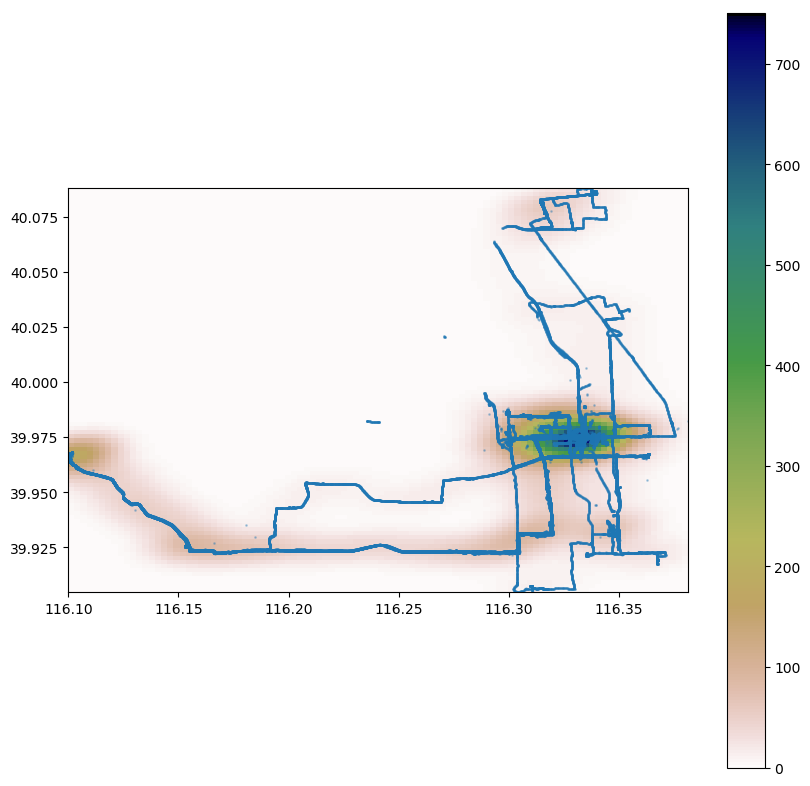

In [74]:
estimation_gaussienne(traces)

In [38]:
traces = TraceByUser('015')
traces.shape

(87736, 7)

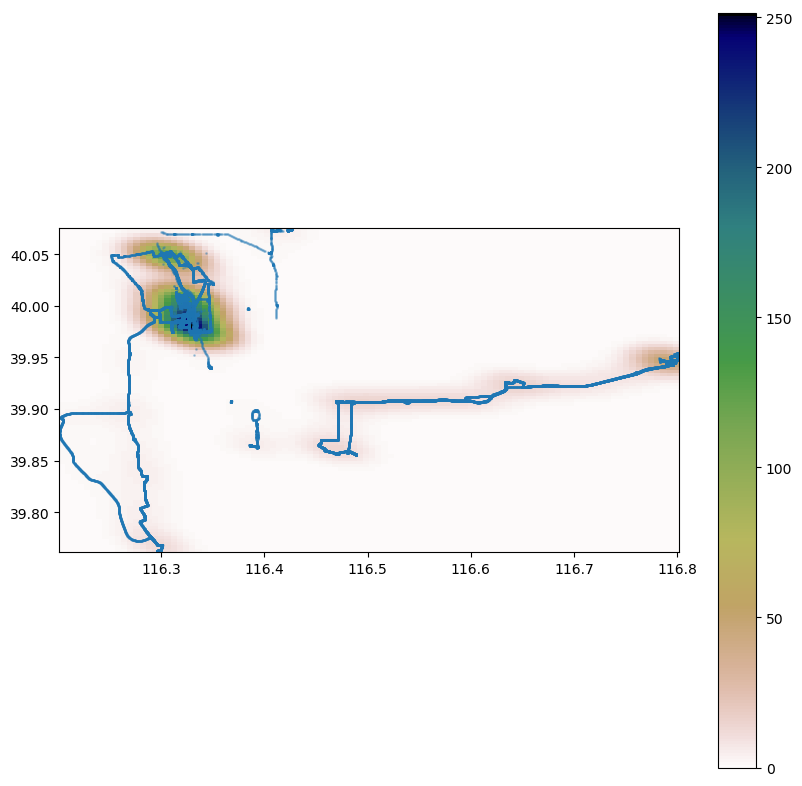

In [39]:
estimation_gaussienne(traces)

## Entopie

In [40]:
from scipy.stats import entropy

def p_log_p(freq):
    """ fonction pour calculer \sum p_i log(p_i) """
    return np.nan_to_num(np.sum(freq*np.log2(freq)))

def entrop(y):
    """ calcul de l'entropie d'un ensemble"""
    ylen = float(y.size)
    if ylen <= 1:
        return 0
    freq = np.array(list(Counter(y).values()))/ylen
    return -p_log_p(freq)

def entropy_cond(y_list):
    h, total = 0.,0.
    for y in y_list:
        h += len(y)*entrop(y)
        total += len(y)
    return h/total

def entropy_cond2(y_list):
    h, total = 0.,0.
    for y in y_list:
        h += len(y)*entropy(y)
        total += len(y)
    return h/total

In [41]:
from collections import Counter
def entropie(vect):
    hY = 0
    ctr = Counter()
    for i in vect:
        ctr[i] += 1
    for y in ctr:
        hY -= ctr[y]/len(vect)*math.log(ctr[y]/len(vect), 2)
    return hY

def entropie_2D(vect):
    hY = 0
    ctr = Counter()
    for i in vect:
        ctr[tuple(i)] += 1
    for y in ctr:
        hY -= ctr[y]/len(vect)*math.log(ctr[y]/len(vect), 2)
    return hY

### Entopie Spatiale

In [42]:
entropie(traces[:,0].astype(np.float))

14.894194323930982

In [43]:
entropie_2D(traces[:,:2].astype(np.float))

16.351062172516436

In [44]:
a = np.array(list(Counter(traces[:,0].astype(np.float)).values()))
freq = a/a.shape[0]
entropy(freq)

10.323868802339426

In [45]:
entropy_cond2(traces[:,:2].astype(np.float))

0.56849353296833516

In [46]:
entropy_cond(traces[:,:2].astype(np.float))

1.0

In [47]:
entrop(traces[:,0].astype(np.float))

14.894194323923369

In [48]:
freq = np.array(list(Counter(traces[:,0].astype(np.float)).values()))
entropy(freq/sum(freq))

10.323868802339426

In [49]:
entropy_cond([traces[:,0].astype(np.float),traces[:,1].astype(np.float)])

14.933799943832621

### Entropie temporelle

In [7]:
user = TraceByUser('016')
user.shape

(89272, 7)

In [8]:
eloigne = []
vitesse = []
for i in range(user.shape[0]-1):
    if(i==0):
        current = i
    f = user[i]
    l = user[i+1]
    distance = get_distance_m(f[0].astype(np.float) , f[1].astype(np.float),\
                                l[0].astype(np.float),l[1].astype(np.float))
    
    duree = (l[4].astype(np.float)-f[4].astype(np.float))*24
    if(duree==0):
        v = 0
    else:
        v = distance/duree
    vitesse.append(v)

    if(v<2):  
        distance = get_distance_m(user[current][0].astype(np.float) , user[current][1].astype(np.float),\
                                user[i][0].astype(np.float),user[i][1].astype(np.float))
        duree = (user[i][4].astype(np.float)-user[current][4].astype(np.float))*24*60*60
        eloigne.append([current,i,distance,duree])
        current = i
    #if(distance>5):    
    #    eloigne.append([i,i+1,distance,(duree*60*60)])
len(eloigne)

22408

In [9]:
def getNewsPoints(f,l,nbPoint,intervalle):
    new = [f]
    
    pasLat = (l[0]-f[0])/nbPoint
    pasLong = (l[1]-f[1])/nbPoint
    pasAlt = (l[2]-f[2])/nbPoint
    for j in range(nbPoint-1):
        current = new[-1]
        lat = float(current[0]) + pasLat
        long = float(current[1]) + pasLong
        alt = float(current[2]) + pasAlt
        nbj = float(current[3]) + (intervalle / (24*60*60)) #intervalle en jours
        new.append([lat,long,alt,nbj])
        
    new.append(l)
    
    return np.array(new)

In [10]:
eloigne = np.array(eloigne)
loin = eloigne[:,0]
positions = dict()
for i in range(eloigne.shape[0]):
    pos = eloigne[i][0]
    positions[str(int(pos))] = eloigne[i]
positions

{'0': array([   0.        ,   42.        ,    0.1694601 ,  116.99999466]),
 '42': array([  4.20000000e+01,   4.50000000e+01,   3.91505531e-03,
          1.49999985e+01]),
 '45': array([  4.50000000e+01,   6.70000000e+01,   6.06738469e-02,
          9.10000056e+01]),
 '67': array([  6.70000000e+01,   8.30000000e+01,   6.26854837e-02,
          7.69999998e+01]),
 '83': array([  8.30000000e+01,   8.70000000e+01,   7.18597935e-03,
          1.79999967e+01]),
 '87': array([  8.70000000e+01,   8.90000000e+01,   8.53068871e-03,
          1.00000055e+01]),
 '89': array([  8.90000000e+01,   9.00000000e+01,   1.51956991e-03,
          4.99999363e+00]),
 '90': array([  90.        ,  112.        ,    0.14387398,  106.00000403]),
 '112': array([  1.12000000e+02,   1.15000000e+02,   6.01223082e-03,
          1.49999991e+01]),
 '115': array([ 115.        ,  200.        ,    0.93226785,  209.99999566]),
 '200': array([  2.00000000e+02,   2.14000000e+02,   1.62574457e-01,
          4.10000052e+01]),
 '

In [11]:
u = np.hstack((user[:,:2].astype(np.float), user[:,3:5].astype(np.float)))
news = []
for i in range(u.shape[0]):#len(eloigne)):
    if(i in loin):
        pos = positions[str(i)]
        f = u[int(pos[0])]
        l = u[int(pos[1])]
        
        intervalle = 5 #intervalle en secondes
        nbPoint = int(round(round(pos[-1])/intervalle))
        if(nbPoint<=1):
            news.append(f)
            news.append(l)
            continue

        new = getNewsPoints(f,l,nbPoint,intervalle)
        news.append(new)
    #else:
     #   news.append(u[i])
len(news)

40497

In [12]:
c = []
for i in range(len(news)):
    if(len(news[i].shape)>1):
        c.extend(news[i].tolist())
    else:
        c.append(news[i].tolist())
print(len(c))
c

921043


[[39.976437, 116.34093, 306.0, 39746.1958217593],
 [39.97640965217391,
  116.34085134782609,
  300.69565217391306,
  39746.19587962967],
 [39.97638230434783, 116.34077269565218, 295.3913043478261, 39746.19593750004],
 [39.976354956521746,
  116.34069404347827,
  290.0869565217392,
  39746.195995370406],
 [39.97632760869566,
  116.34061539130435,
  284.78260869565224,
  39746.196053240776],
 [39.97630026086958,
  116.34053673913044,
  279.4782608695653,
  39746.196111111145],
 [39.976272913043495,
  116.34045808695653,
  274.17391304347836,
  39746.196168981514],
 [39.97624556521741,
  116.34037943478262,
  268.8695652173914,
  39746.196226851884],
 [39.97621821739133, 116.34030078260871, 263.5652173913045, 39746.19628472225],
 [39.976190869565244,
  116.3402221304348,
  258.26086956521755,
  39746.19634259262],
 [39.97616352173916,
  116.34014347826088,
  252.95652173913058,
  39746.19640046299],
 [39.976136173913076,
  116.34006482608697,
  247.6521739130436,
  39746.19645833336],
 [3

In [13]:
dur = []
for i in range(len(c)-1):
    dur.append((c[i+1][3]-c[i][3])*(24*60*60))
dur

[4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 6.999996607191861,
 0.0,
 4.999999911524355,
 4.999999911524355,
 4.99999865423888,
 0.0,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 6.000007060356438,
 0.0,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.999999911524355,
 4.

In [14]:
dur2 = []
for i in range(len(news)):
    dur = []
    if(len(news[i].shape)>1):
        for j in range(news[i].shape[0]-1):
            dur.append((news[i][j+1][3]-news[i][j][3])*(24*60*60))
        dur2.append(dur)
    else:
        dur2.append(news[i])
dur2

[[4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  6.9999966071918607],
 [4.9999999115243554, 4.9999999115243554, 4.9999986542388797],
 [4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  4.9999999115243554,
  6.0000070603564382],
 [4.9999999115243554,
  4.9999999

In [63]:
entrop(np.array(c)[:,3])

19.764253277478822

In [67]:
entrop(user[:,4].astype(np.float))

16.445875320292849

In [68]:
np.array(c).shape

(921043, 4)

In [70]:
entropy(np.array(c)[:,3])

13.733261931447602

In [71]:
entropy(user[:,4].astype(np.float))

11.399443098692537

# Mixture Gaussienne

In [15]:
import itertools
#from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import scipy.stats as st
from scipy import linalg
from sklearn import mixture


In [51]:
users = ['034', '054', '047']
nb_users = len(users)
points = []
min_lon = []
max_lon = []
min_lat = []
max_lat = []
#for user in users:
t = TraceByUser('016')
user_points = t[:,:2].astype('float64')
user_points[:,[0,1]] = user_points[:, [1,0]]
points.append(user_points)
#lat = points[:, 1]
#lon = points[:, 0]
min_lon.append(user_points[:, 0].min())
max_lon.append(user_points[:, 0].max())
min_lat.append(user_points[:, 1].min())
max_lat.append(user_points[:, 1].max())

In [52]:
plt.figure()

#for i in range(nb_users):
#plt.subplot(1, nb_users, i+1)
#plt.title("User "+ users[i])
plt.plot(points[0][:, 0], points[0][:, 1], '.')
plt.show()
plt.close()

In [53]:
nb_max_gaussiennes = 20
proportion_train = 0.8

scores = []
meilleur_score = []
meilleur_gmm = []

#for i in range(nb_users):
#print('\nUser',users[i], end=' ')
points_melanges = points[0][np.random.permutation(points[0].shape[0])]
train = points_melanges[:int(proportion_train*len(points[0]))]
test  = points_melanges[int(proportion_train*len(points[0])):]

meilleur_score.append(0)
meilleur_gmm.append(0)
for n_components in range(1, nb_max_gaussiennes+1):
    # Fit a Gaussian mixture with EM
    print(n_components, 'gaussiennes', end=' ')
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(train)
    scores.append(gmm.score(test))
    print('score =', scores[-1], end=' ')
    if scores[-1] > meilleur_score[-1]:
        meilleur_score.append(scores[-1])
        meilleur_gmm.append(gmm)
scores = np.array(scores).reshape(1, nb_max_gaussiennes).T

1 gaussiennes score = 3.11757112236 2 gaussiennes score = 4.03621243779 3 gaussiennes score = 4.4110325559 4 gaussiennes score = 4.58246014062 5 gaussiennes score = 4.9465180602 6 gaussiennes score = 5.13632894587 7 gaussiennes score = 5.24949577184 8 gaussiennes score = 5.42746939203 9 gaussiennes score = 5.55443228122 10 gaussiennes score = 5.46134294353 11 gaussiennes score = 5.62967455456 12 gaussiennes score = 5.66192262982 13 gaussiennes score = 5.68400551492 14 gaussiennes score = 5.76412171351 15 gaussiennes score = 5.7912216905 16 gaussiennes score = 5.81158050141 17 gaussiennes score = 5.81032986846 18 gaussiennes score = 5.84572342442 19 gaussiennes score = 5.8588217469 20 gaussiennes score = 5.8712261464 

(89272, 2)


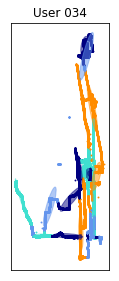

In [54]:
plt.figure()
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])

for i in range(1):
    splot = plt.subplot(1, nb_users, i+1)
    X = points[i]
    clf = meilleur_gmm[-1]
    print(X.shape)
    Y_ = clf.predict(X)
    for j, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == j):
            continue
        plt.scatter(X[Y_ == j, 0], X[Y_ == j, 1], .8, color=color)
    
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)
    
    plt.xticks(())
    plt.yticks(())
    plt.title('User '+users[i])
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

In [55]:
nb_max_gaussiennes = 10
cv_types = ['spherical', 'tied', 'diag', 'full']

bics = []
meilleur_bic = []
meilleur_gmm = []

#for i in range(nb_users):
#print('\nUser',users[i], end=' ')
X = points[0]

meilleur_bic.append(np.infty)
meilleur_gmm.append(0)

for cv_type in cv_types:
    print('cv type:', cv_type, end=' ')
    for n_components in range(1, nb_max_gaussiennes+1):
        print(n_components, "gaussiennes", end=' ')
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        #print('bic = ', bics[-1], end=' ')
        if bics[-1] < meilleur_bic[-1]:
            meilleur_bic.append(bics[-1])
            meilleur_gmm.append(gmm)

bics_temp = bics
bics = np.array(bics).reshape(1, len(cv_types), nb_max_gaussiennes)

cv type: spherical 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes cv type: tied 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes cv type: diag 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes cv type: full 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes 

In [56]:
bics_temp2= np.array(bics_temp).reshape(1, len(cv_types)*nb_max_gaussiennes) 
bics_temp2[0] 

array([ -486366.58293559,  -658362.45294756,  -709682.01557134,
        -738943.43708031,  -859073.36334232,  -874386.15450555,
        -879135.57527657,  -894994.81009123,  -888068.57460474,
        -907020.69294076,  -556278.04109532,  -660697.78836435,
        -699669.41011646,  -740272.42198923,  -766042.4049867 ,
        -799258.3857883 ,  -799042.37127481,  -838638.62755516,
        -845918.38174521,  -816501.7789401 ,  -547259.56067998,
        -702895.31116747,  -772449.45831136,  -853056.74160847,
        -867974.12679725,  -881235.47412034,  -923927.08529367,
        -952223.15110273,  -960831.17803877,  -937729.14617673,
        -556278.04109389,  -720008.3868234 ,  -756115.31902345,
        -818844.54810775,  -905619.13408988,  -916820.6344414 ,
        -959364.49640707,  -961771.69876004,  -973108.10640185,
       -1001965.02231781])

In [57]:
np.min(bics[0]) 

-1001965.022317813

In [58]:
meilleur_bic 

[inf,
 -486366.58293559414,
 -658362.45294756046,
 -709682.01557134243,
 -738943.43708031194,
 -859073.36334231589,
 -874386.15450554516,
 -879135.5752765662,
 -894994.81009122811,
 -907020.69294075912,
 -923927.08529366669,
 -952223.15110273403,
 -960831.17803876812,
 -961771.69876003894,
 -973108.10640184663,
 -1001965.022317813]

In [59]:
plt.figure()
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])

#for j in range(nb_users):
bars = []
bic = bics_temp2[0]
# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
#plt.title("User "+users[0]+" BIC")
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(range(1, nb_max_gaussiennes+1)) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * nb_max_gaussiennes:(i + 1) * nb_max_gaussiennes], width=.2, color=color))
plt.xticks(range(1, nb_max_gaussiennes+1))
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), nb_max_gaussiennes) + .65 +.2 * np.floor(bic.argmin() / nb_max_gaussiennes)
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, nb_users, 4)
X = points[0]
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
    
plt.xticks(())
plt.yticks(())
plt.title('Selected GMM')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

## Avec Interpolation

In [20]:
users = ['034', '054', '047']
nb_users = len(users)
points = []
min_lon = []
max_lon = []
min_lat = []
max_lat = []
#for user in users:
t = np.array(c)#TraceByUser(user)
user_points = t[:,:2].astype('float64')
user_points[:,[0,1]] = user_points[:, [1,0]]
points.append(user_points)
#lat = points[:, 1]
#lon = points[:, 0]
min_lon.append(user_points[:, 0].min())
max_lon.append(user_points[:, 0].max())
min_lat.append(user_points[:, 1].min())
max_lat.append(user_points[:, 1].max())

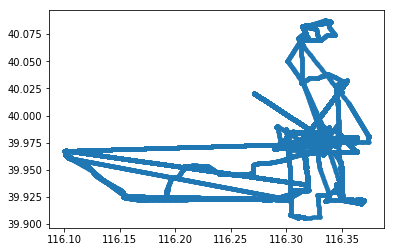

In [23]:
plt.figure()

#for i in range(nb_users):
#plt.subplot(1, nb_users, i+1)
#plt.title("User "+ users[i])
plt.plot(points[0][:, 0], points[0][:, 1], '.')
plt.show()
plt.close()

In [28]:
nb_max_gaussiennes = 20
proportion_train = 0.8

scores = []
meilleur_score = []
meilleur_gmm = []

#for i in range(nb_users):
#print('\nUser',users[i], end=' ')
points_melanges = points[0][np.random.permutation(points[0].shape[0])]
train = points_melanges[:int(proportion_train*len(points[0]))]
test  = points_melanges[int(proportion_train*len(points[0])):]

meilleur_score.append(0)
meilleur_gmm.append(0)
for n_components in range(1, nb_max_gaussiennes+1):
    # Fit a Gaussian mixture with EM
    print(n_components, 'gaussiennes', end=' ')
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(train)
    scores.append(gmm.score(test))
    print('score =', scores[-1], end=' ')
    if scores[-1] > meilleur_score[-1]:
        meilleur_score.append(scores[-1])
        meilleur_gmm.append(gmm)
scores = np.array(scores).reshape(1, nb_max_gaussiennes).T

1 gaussiennes score = 3.69375101874 2 gaussiennes score = 5.0057529732 3 gaussiennes score = 6.64919288458 4 gaussiennes score = 6.78529622349 5 gaussiennes score = 6.91584152569 6 gaussiennes score = 6.97882557362 7 gaussiennes score = 7.00706983979 8 gaussiennes score = 7.15998541313 9 gaussiennes score = 7.21849255197 10 gaussiennes score = 7.23720598921 11 gaussiennes score = 7.25415204799 12 gaussiennes score = 7.26005429769 13 gaussiennes score = 7.36941514722 14 gaussiennes score = 7.41154497459 15 gaussiennes score = 7.39548330618 16 gaussiennes score = 7.44524137093 17 gaussiennes score = 7.39158291408 18 gaussiennes score = 7.40414824448 19 gaussiennes score = 7.52406519699 20 gaussiennes score = 7.57211425743 

ValueError: cannot reshape array of size 20 into shape (3,20)

In [37]:
scores = np.array(scores).reshape(1, nb_max_gaussiennes).T

In [41]:
plt.figure()
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])

for i in range(1):
    splot = plt.subplot(1, nb_users, i+1)
    X = points[i]
    clf = meilleur_gmm[-1]
    print(X.shape)
    Y_ = clf.predict(X)
    for j, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == j):
            continue
        plt.scatter(X[Y_ == j, 0], X[Y_ == j, 1], .8, color=color)
    
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)
    
    plt.xticks(())
    plt.yticks(())
    plt.title('User '+users[i])
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

(921043, 2)


In [43]:
nb_max_gaussiennes = 10
cv_types = ['spherical', 'tied', 'diag', 'full']

bics = []
meilleur_bic = []
meilleur_gmm = []

#for i in range(nb_users):
#print('\nUser',users[i], end=' ')
X = points[0]

meilleur_bic.append(np.infty)
meilleur_gmm.append(0)

for cv_type in cv_types:
    print('cv type:', cv_type, end=' ')
    for n_components in range(1, nb_max_gaussiennes+1):
        print(n_components, "gaussiennes", end=' ')
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        #print('bic = ', bics[-1], end=' ')
        if bics[-1] < meilleur_bic[-1]:
            meilleur_bic.append(bics[-1])
            meilleur_gmm.append(gmm)

bics_temp = bics
bics = np.array(bics).reshape(nb_users, len(cv_types), nb_max_gaussiennes)

cv type: spherical 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes cv type: tied 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes cv type: diag 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes cv type: full 1 gaussiennes 2 gaussiennes 3 gaussiennes 4 gaussiennes 5 gaussiennes 6 gaussiennes 7 gaussiennes 8 gaussiennes 9 gaussiennes 10 gaussiennes 

ValueError: cannot reshape array of size 40 into shape (3,4,10)

In [44]:
bics = np.array(bics).reshape(1, len(cv_types), nb_max_gaussiennes)
bics.shape

(1, 4, 10)

In [46]:
bics_temp2= np.array(bics_temp).reshape(1, len(cv_types)*nb_max_gaussiennes) 

In [47]:
bics_temp2[0] 

array([ -5647325.49865667,  -8819933.39669231, -11992021.02190321,
       -12085308.93757143, -12376407.72699881, -12368816.24712491,
       -12683575.83199967, -12707826.97253577, -12721673.3464726 ,
       -12767900.98758653,  -6800931.73053928,  -8857758.61034786,
        -9620118.56933616, -10067124.9482546 , -10307733.24831927,
       -10509618.44698394, -10800334.69504461, -11304673.58912363,
       -11544307.62290183, -11687414.44938059,  -6746337.13905978,
        -9169278.12582464, -11726361.51263091, -12440459.45259253,
       -12577927.90710718, -12724940.15640296, -12690969.85434077,
       -12822873.31222055, -12973764.75621213, -13148893.19355639,
        -6800931.73035521,  -9221029.0939824 , -12246685.86546894,
       -12382984.81526219, -12738268.87161771, -12765402.89580429,
       -13029345.87853784, -13208618.84946866, -13228048.63578765,
       -13235310.13843671])

In [48]:
np.min(bics[0]) 

-13235310.138436712

In [49]:
meilleur_bic 

[inf,
 -5647325.4986566715,
 -8819933.3966923058,
 -11992021.021903208,
 -12085308.937571432,
 -12376407.726998813,
 -12683575.831999669,
 -12707826.972535767,
 -12721673.3464726,
 -12767900.987586528,
 -12822873.312220545,
 -12973764.75621213,
 -13148893.193556387,
 -13208618.84946866,
 -13228048.635787647,
 -13235310.138436712]

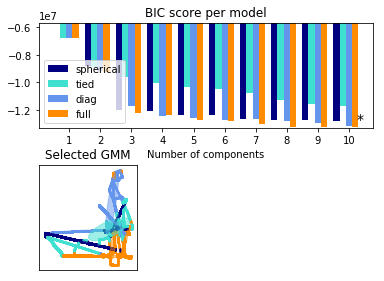

In [50]:
plt.figure()
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])

#for j in range(nb_users):
bars = []
bic = bics_temp2[0]
# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
#plt.title("User "+users[0]+" BIC")
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(range(1, nb_max_gaussiennes+1)) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * nb_max_gaussiennes:(i + 1) * nb_max_gaussiennes], width=.2, color=color))
plt.xticks(range(1, nb_max_gaussiennes+1))
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), nb_max_gaussiennes) + .65 +.2 * np.floor(bic.argmin() / nb_max_gaussiennes)
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, nb_users, 4)
X = points[0]
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
    
plt.xticks(())
plt.yticks(())
plt.title('Selected GMM')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()